In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['IBB']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  105.79  106.09  102.43  102.57  5412954    IBB
 2015-01-16  102.51  105.99  102.50  105.94  5792136    IBB
 2015-01-20  106.76  107.94  104.94  107.74  5039067    IBB
 2015-01-21  107.13  107.77  105.85  106.16  4413960    IBB
 2015-01-22  106.63  107.01  103.71  106.99  4982826    IBB
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  122.72  123.74  122.48  123.50   973173    IBB
 2019-12-26  123.51  123.68  122.40  122.58  2539703    IBB
 2019-12-27  123.10  123.20  121.17  121.56  3284499    IBB
 2019-12-30  121.34  121.79  119.66  120.18  4155188    IBB
 2019-12-31  119.97  120.75  119.48  120.51  3002886    IBB
 
 [1249 rows x 6 columns]]

In [4]:
ibb = data[0]
ibb.to_csv('ibb.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  105.79  106.09  102.43  102.57  5412954    IBB
 2015-01-16  102.51  105.99  102.50  105.94  5792136    IBB
 2015-01-20  106.76  107.94  104.94  107.74  5039067    IBB
 2015-01-21  107.13  107.77  105.85  106.16  4413960    IBB
 2015-01-22  106.63  107.01  103.71  106.99  4982826    IBB
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  122.72  123.74  122.48  123.50   973173    IBB
 2019-12-26  123.51  123.68  122.40  122.58  2539703    IBB
 2019-12-27  123.10  123.20  121.17  121.56  3284499    IBB
 2019-12-30  121.34  121.79  119.66  120.18  4155188    IBB
 2019-12-31  119.97  120.75  119.48  120.51  3002886    IBB
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [11]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6738      0.242     -2.787      0.005      -1.148      -0.200
ar.L2         -0.0305      0.029     -1.047      0.295      -0.088       0.027
ma.L1         -0.3053      4.086     -0.075      0.940      -8.314       7.703
ma.L2         -0.6947      2.845     -0.244      0.807      -6.271       4.881
ma.S.L5       -0.0183      0.027     -0.665      0.506      -0.072       0.036
ma.S.L10      -0.0022      0.026     -0.082      0.934      -0.054       0.049
sigma2         2.4842     10.132      0.245      0.806     -17.375      22.343


In [12]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('ibb_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.6738,0.242,-2.787,0.005,-1.148,-0.200
2,ar.L2,-0.0305,0.029,-1.047,0.295,-0.088,0.027
3,ma.L1,-0.3053,4.086,-0.075,0.940,-8.314,7.703
4,ma.L2,-0.6947,2.845,-0.244,0.807,-6.271,4.881
5,ma.S.L5,-0.0183,0.027,-0.665,0.506,-0.072,0.036
6,ma.S.L10,-0.0022,0.026,-0.082,0.934,-0.054,0.049
7,sigma2,2.4842,10.132,0.245,0.806,-17.375,22.343


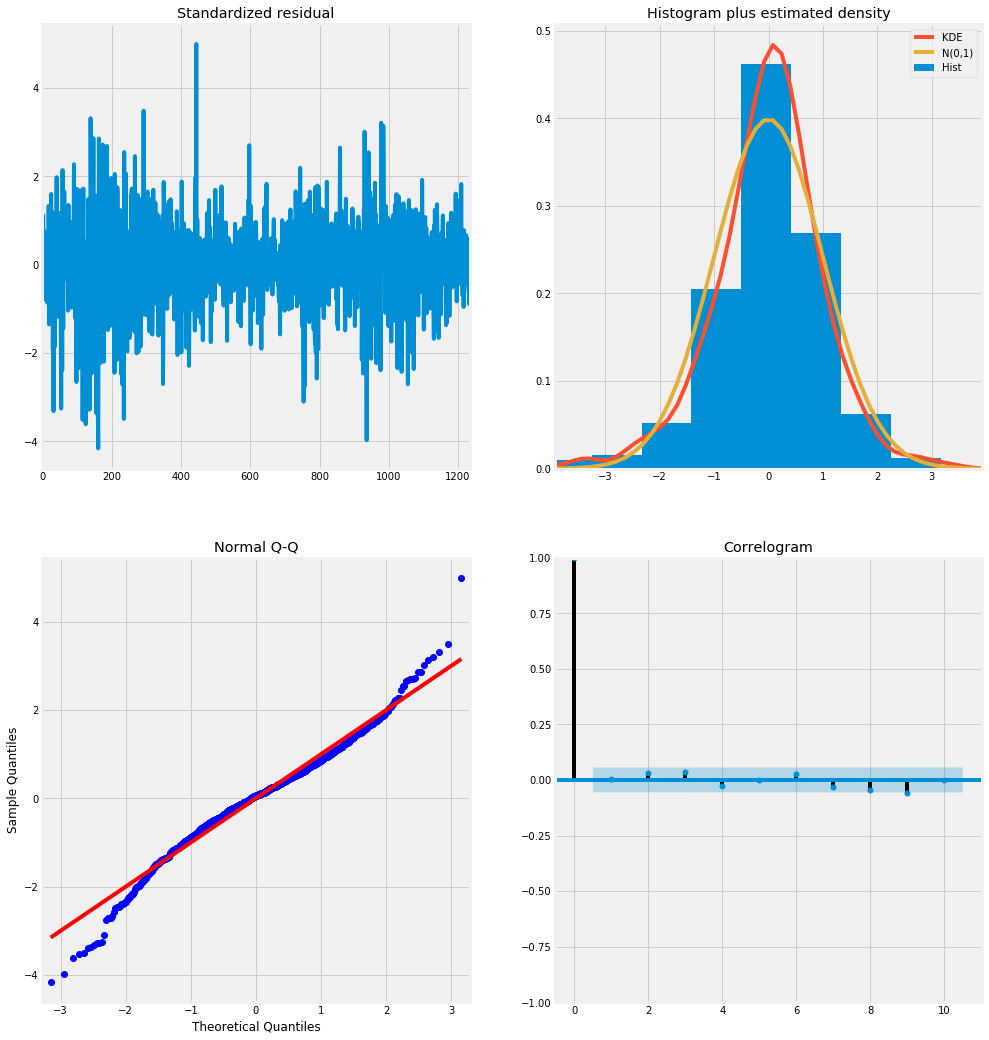

In [13]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('ibboutput.png')
plt.show()

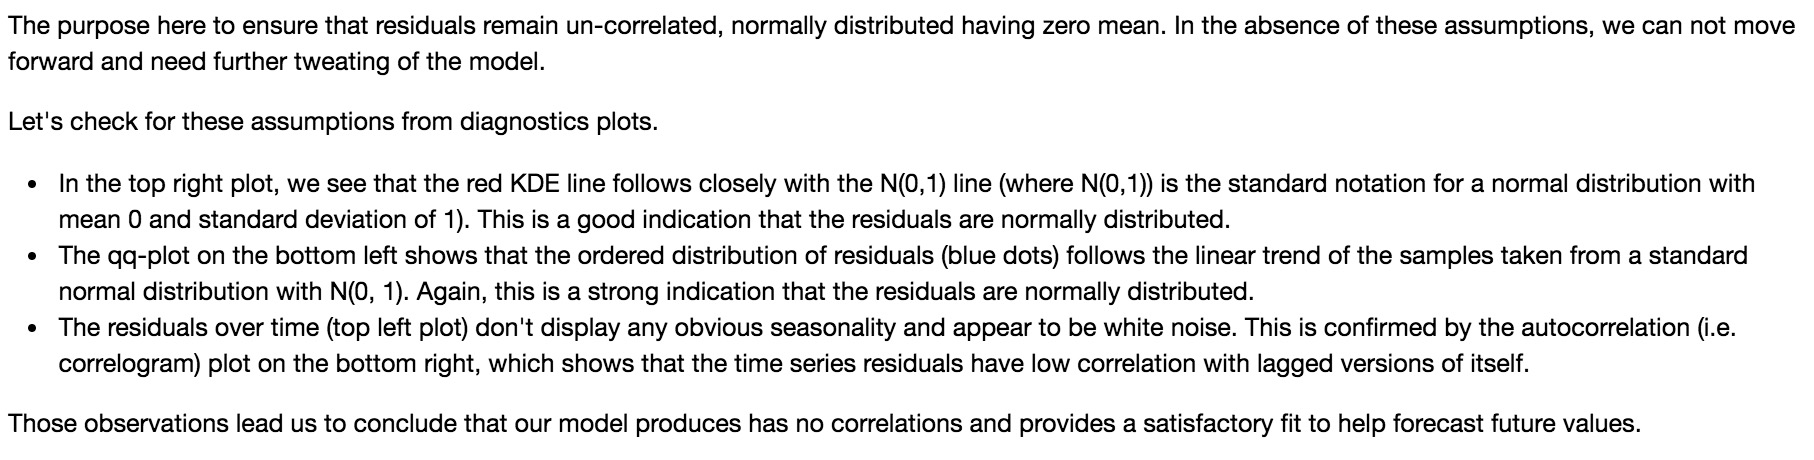

In [14]:
# plt.savefig('arima1.png')

In [15]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

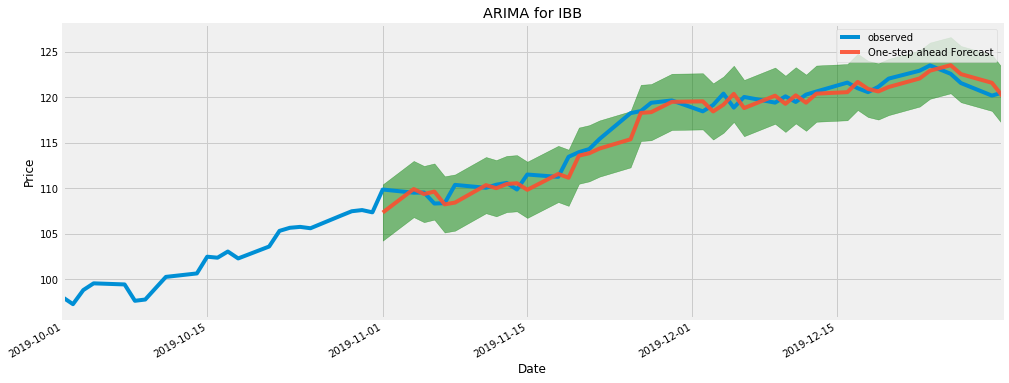

In [22]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for IBB')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('ibb_arima.png')
plt.show()

In [23]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.21


In [24]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

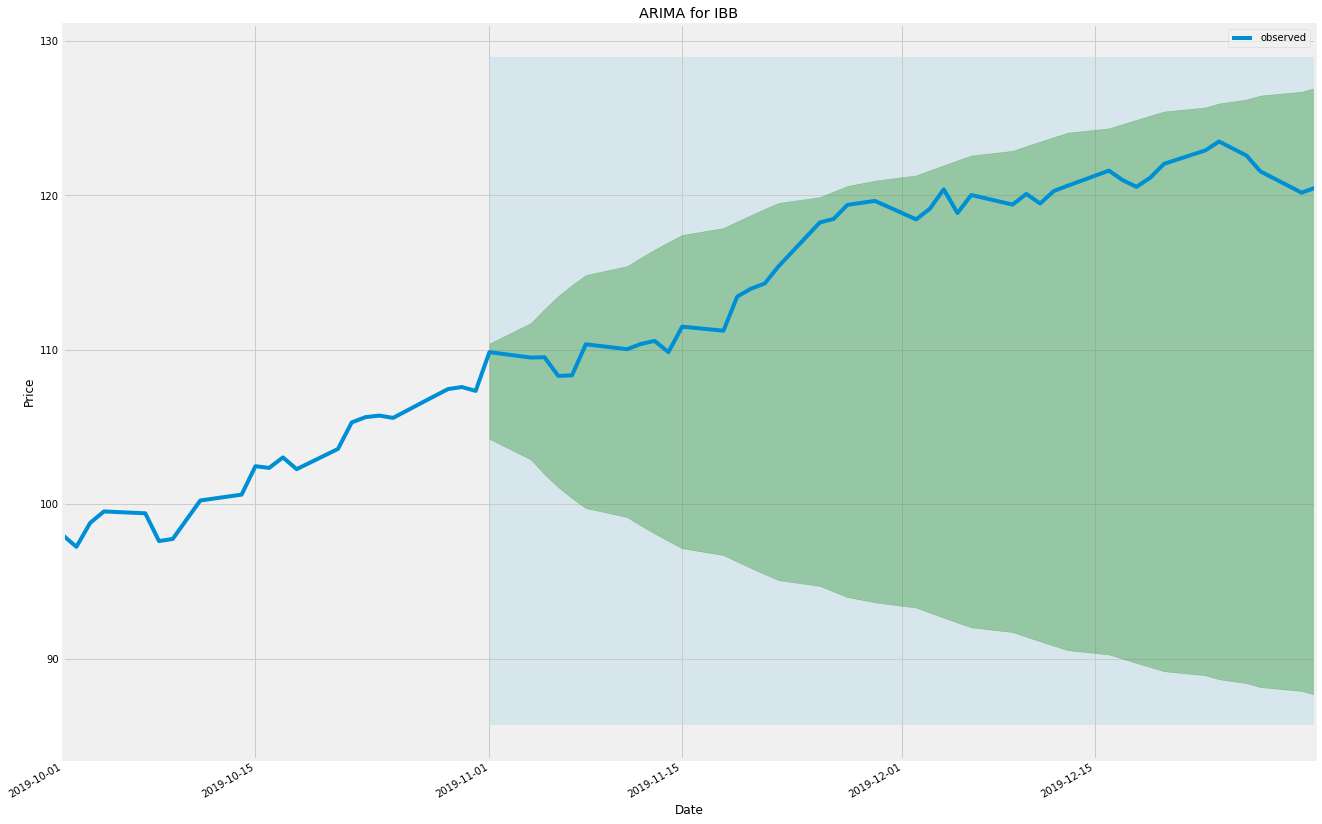

In [25]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for IBB')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('ibb_arima2.png')
plt.show()

In [28]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 112.94


In [29]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [31]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

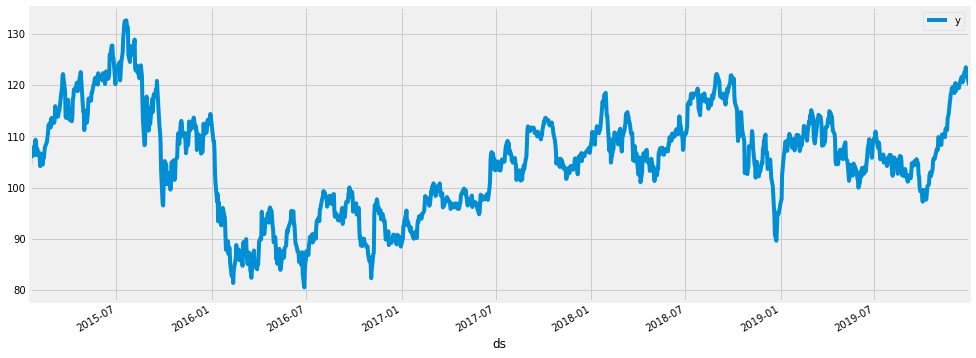

In [32]:
spy.set_index('ds').plot()

In [33]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [34]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [35]:
ibb_df_novjan = df.tail(71)
ibb_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [36]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [37]:
# pull_df

In [38]:
ibb_yf = pd.read_csv('IBB_yf.csv')
ibb_yf = ibb_yf.rename(columns={"Date": "ds"})
ibb_yf['ds'] = pd.to_datetime(ibb_yf['ds'])

ibb_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [39]:
ibb_yf1 = ibb_yf[['ds','Adj Close']]
ibb_yf1

,ds,Adj Close
0,2019-11-01,109.797180
1,2019-11-04,109.447350
2,2019-11-05,109.467339
3,2019-11-06,108.257919
4,2019-11-07,108.297897
5,2019-11-08,110.306938
6,2019-11-11,109.987091
7,2019-11-12,110.326920
8,2019-11-13,110.526833
9,2019-11-14,109.797180


In [40]:
comb = ibb_df_novjan.join(ibb_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('ibb_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,109.529467,101.242024,118.594228,111.186508,1.657041,1.49%
1220,2019-11-19,109.761203,100.968387,118.631224,113.395447,3.634244,3.20%
1221,2019-11-20,109.879234,101.046471,118.649518,113.905205,4.025971,3.53%
1222,2019-11-21,109.943829,100.886621,118.692056,114.245041,4.301212,3.76%
1223,2019-11-22,110.192038,101.019186,118.834855,115.354507,5.162469,4.48%
1224,2019-11-25,110.550456,101.165680,119.534797,118.193138,7.642682,6.47%
1225,2019-11-26,110.688753,101.718972,119.483112,118.423035,7.734282,6.53%
1226,2019-11-27,110.708117,101.365929,119.562290,119.332596,8.624479,7.23%
1227,2019-11-29,110.814303,101.288554,120.065851,119.592468,8.778165,7.34%
1228,2019-12-02,110.863647,101.122403,119.305790,118.393044,7.529397,6.36%


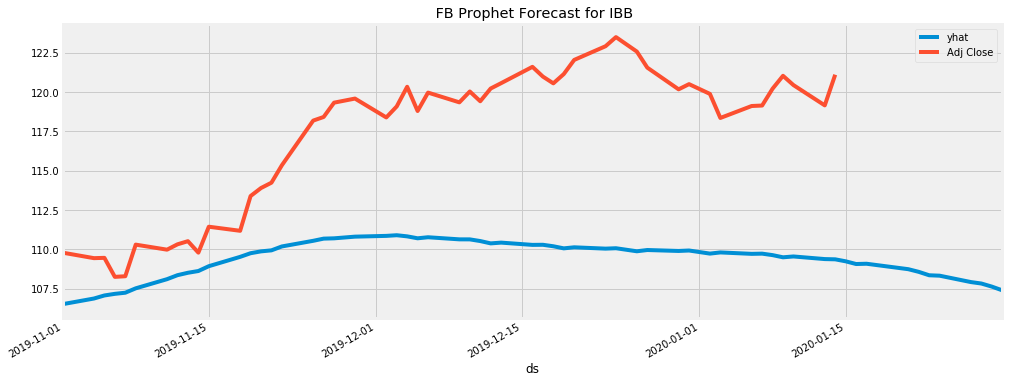

In [41]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for IBB')
plt.savefig('ibb_fbproph_forecast.png')

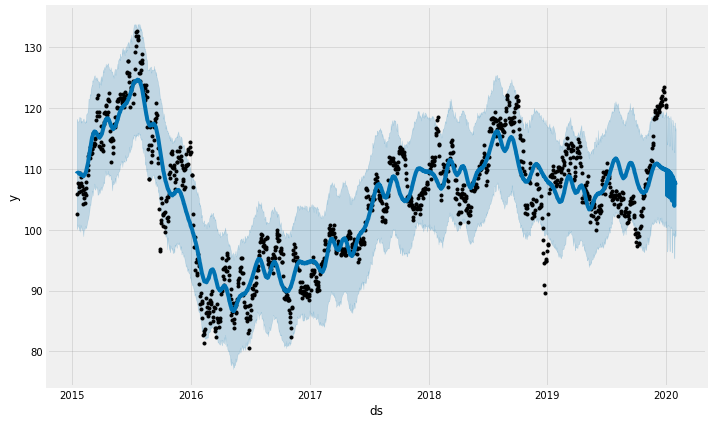

In [42]:
p.plot(df)
plt.savefig('ibb_fbp2.png')

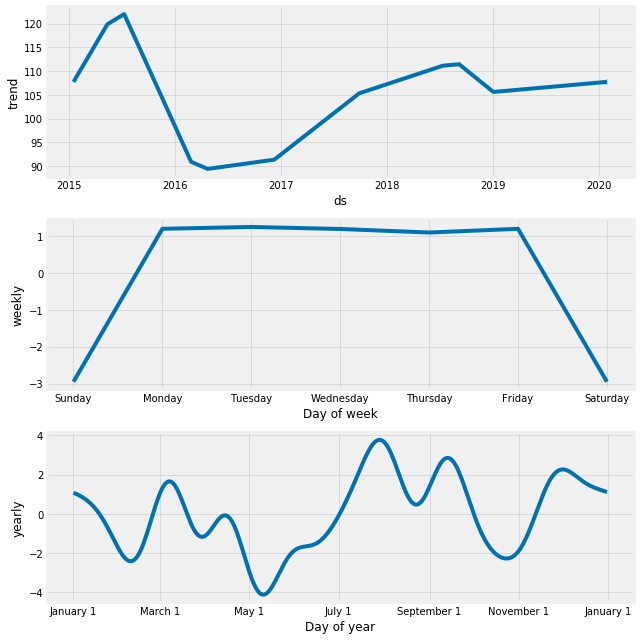

In [43]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('ibb_seasonality.png')

In [44]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [45]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,99.619165
2019-12-02,104.132888
2019-12-03,103.922041
2019-12-04,103.670337
2019-12-05,103.209336
2019-12-06,102.995634
2019-12-07,97.848117
2019-12-08,97.546009
2019-12-09,102.036075
